In [7]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


import torch
import sys
import socket
import os
from pathlib import Path

HOST = socket.gethostbyname(socket.gethostname())
FILE = Path.cwd()
ROOT = FILE.parents[0]
WORK_DIR = os.path.dirname(ROOT)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
JSON_DIR = os.path.join(WORK_DIR,"Tensorbot_NLP_System", "data", "exp","intents.json")

with open(JSON_DIR, "r") as f:
    data_json = json.load(f)
    
df = pd.DataFrame(data_json['intents'])
df.head()

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."


In [15]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)

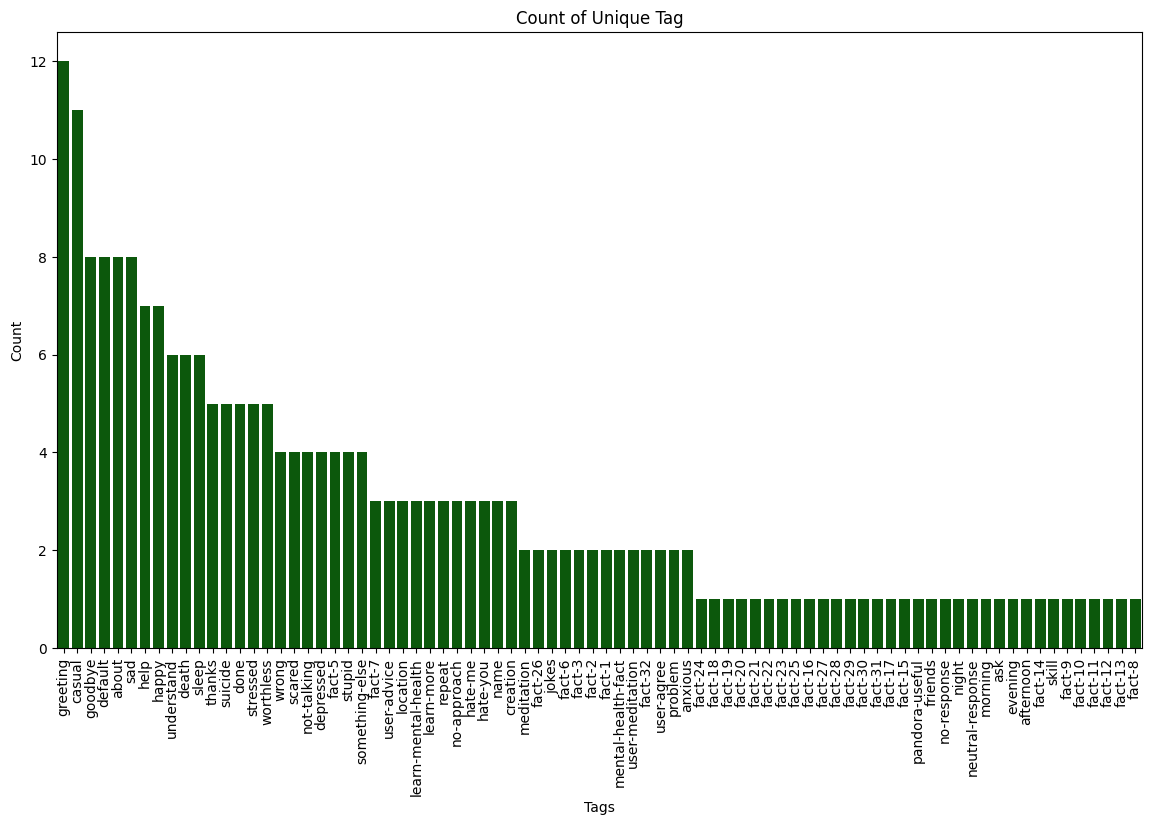

In [16]:
tag_counts = df['tag'].value_counts().reset_index()

tag_counts.columns = ['tag', 'count']
plt.figure(figsize=(14, 8))
sns.barplot(x = "tag", y="count", data = tag_counts, order=tag_counts["tag"], color = "darkgreen")

plt.xlabel("Tags")
plt.ylabel("Count")
plt.title("Count of Unique Tag")

plt.xticks(rotation = 90)
plt.show()


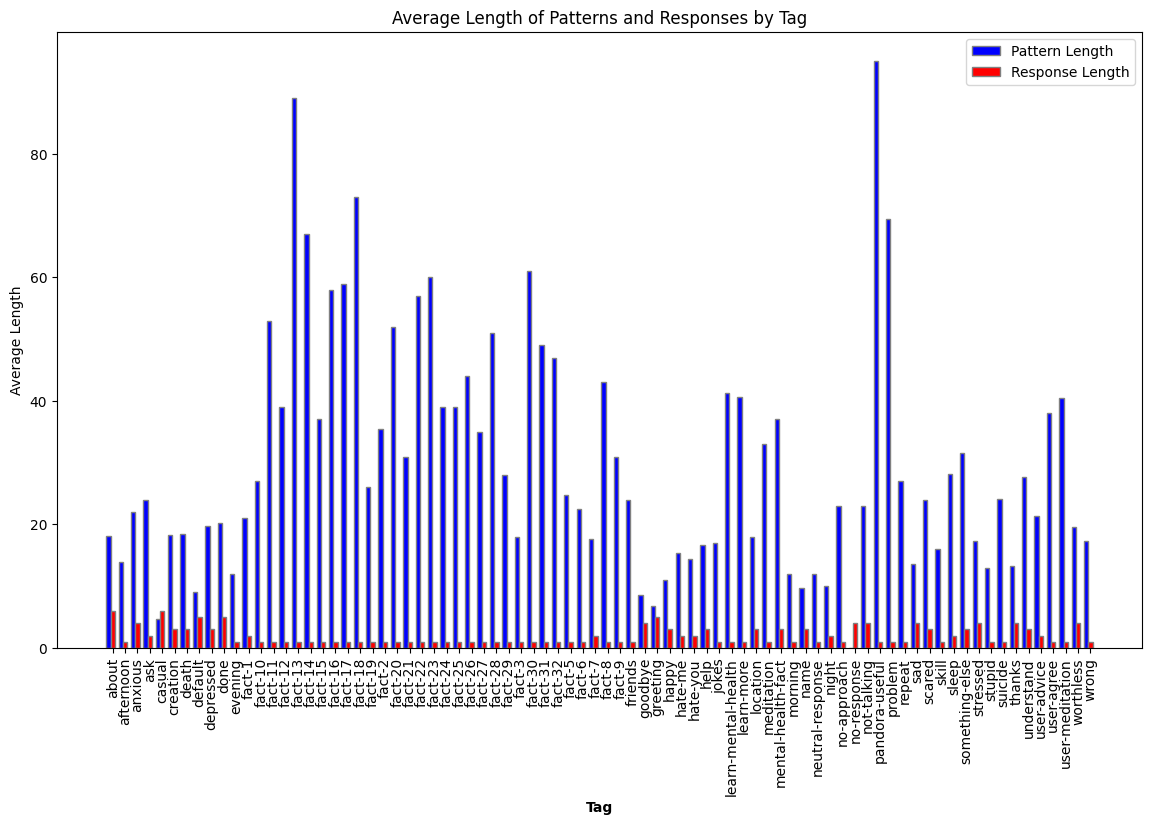

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'patterns' and 'responses' columns
df["len_pattern"] = df["patterns"].apply(lambda x: len(x))
df["len_response"] = df["responses"].apply(lambda x: len(x))

avg_len_pattern = df.groupby("tag")["len_pattern"].mean()
avg_len_response = df.groupby("tag")["len_response"].mean()

avg_len_df = pd.DataFrame({
    "avg_len_pattern": avg_len_pattern,
    "avg_len_response": avg_len_response
}).reset_index()

plt.figure(figsize=(14, 8))
bar_width = 0.35

r1 = range(len(avg_len_df))
r2 = [x + bar_width for x in r1]

plt.bar(r1, avg_len_df['avg_len_pattern'], color='b', width=bar_width, edgecolor='grey', label='Pattern Length')
plt.bar(r2, avg_len_df['avg_len_response'], color='r', width=bar_width, edgecolor='grey', label='Response Length')

plt.xlabel('Tag', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(avg_len_df))], avg_len_df['tag'], rotation=90)

plt.ylabel('Average Length')
plt.title('Average Length of Patterns and Responses by Tag')
plt.legend()
plt.show()


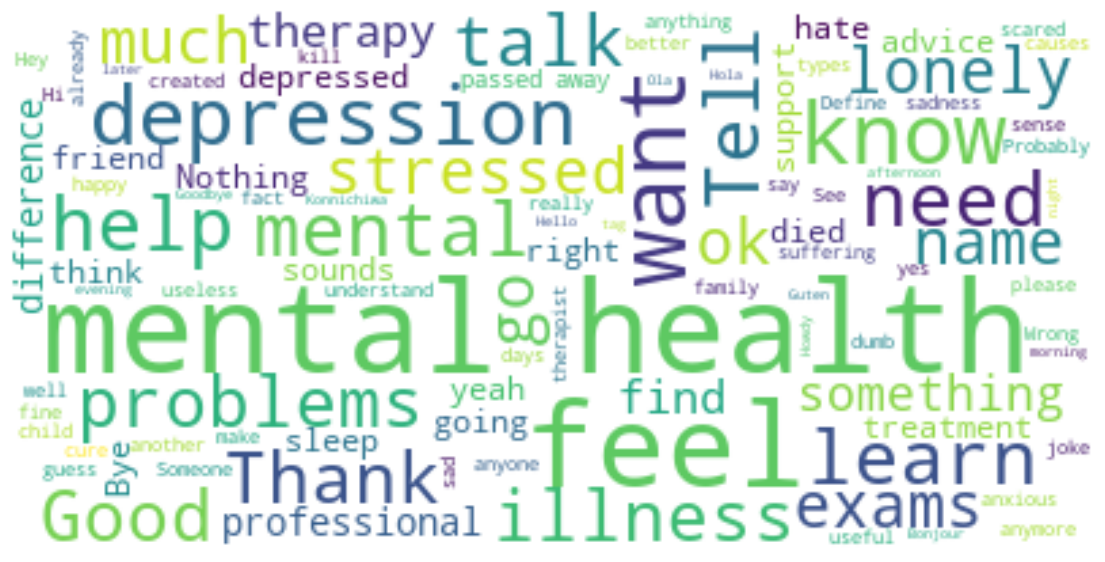

In [35]:
from wordcloud import WordCloud

df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

wc = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='black').generate(all_patterns)

# Remove the axis and display the data as image
plt.figure(figsize=(14, 8))
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()